In [ ]:
# importamos librerias a utilizar en todo el análisis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# configuración estética global, para mejorar la legibilidad de los gráficos (facilita la comparación visual de valores y tendencias, especialmente en variables numéricas)
%matplotlib inline
sns.set(style="whitegrid")

# para guardar las visualizaciones en la carpeta outputs
import os

os.makedirs("outputs", exist_ok=True)

# Ejercicio de Evaluación
## Fase 1: Exploración y Limpieza

### Exploración Inicial:

Realiza una exploración inicial de los datos para identificar posibles problemas, como nulos, atípicos o datos faltantes en las columnas relevantes.

Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

Une los dos conjuntos de datos de la forma más eficiente.

### Limpieza de Datos:

Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos
estén completos.

Verifica la consistencia y corrección de los datos para asegurarte de que los datos se
presenten de forma coherente.

Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de
datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [2]:
# EDA: Dataset Customer Flight Activity.csv

df_flights = pd.read_csv("../data/Customer Flight Activity.csv")

In [3]:
# Exploración del dataset (variables)
df_flights.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
# Nº de filas y columnas
df_flights.shape    

(405624, 10)

In [5]:
# Estructura y  tipos de datos
df_flights.info()       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


OBSERVACIONES: 

A) Loyalty Number es el identificador clave.

B) A priori no parece necesaria ninguna conversión inicial en los tipos de datos de las variables.

In [6]:
# Duplicados
df_flights.duplicated().sum()

np.int64(1864)

In [7]:
df_flights[df_flights.duplicated()]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [8]:
# Definir qué significan estos duplicados
df_flights.duplicated(subset=["Loyalty Number", "Year", "Month"]).sum()

np.int64(3936)

In [9]:
# Inspeccionar estos casos
df_flights[
    df_flights.duplicated(subset=["Loyalty Number", "Year", "Month"], keep=False)
].sort_values(["Loyalty Number", "Year", "Month"])

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
16942,101902,2017,2,0,0,0,0,0.0,0,0
16943,101902,2017,2,0,0,0,0,0.0,0,0
33843,101902,2017,3,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
371685,992168,2018,10,0,0,0,0,0.0,0,0
130846,992168,2018,11,11,5,16,3360,336.0,502,41
336313,992168,2018,11,1,1,2,546,54.0,343,28
405486,992168,2018,12,15,0,15,3120,312.0,0,0


OBSERVACIONES:

Estos registros no son duplicados erróneos, sino múltiples registros de actividad para un mismo cliente dentro del mismo mes.

In [10]:
# DECISIÓN: Como el análisis es mensual y las variables son acumulativas (vuelos, distancia, puntos): se agrega los datos por cliente-año-mes.
df_flights_monthly = (
    df_flights
    .groupby(["Loyalty Number", "Year", "Month"], as_index=False)
    .sum()
)

In [11]:
# Comprobación de un único registro mensual
df_flights_monthly.shape
df_flights_monthly.duplicated(
    subset=["Loyalty Number", "Year", "Month"]
).sum()

np.int64(0)

In [12]:
df_flights.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [13]:
df_flights_monthly.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [14]:
df_flights.shape

(405624, 10)

In [15]:
df_flights_monthly.shape

(401688, 10)

CONCLUSIÓN: 

Tras la agregación por cliente, año y mes, se mantiene la misma estructura de columnas, pero cada fila representa ahora un único registro mensual de actividad por cliente, evitando duplicidades y preservando toda la información relevante.

In [16]:
# Valores nulos
df_flights.isna().sum()      

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

OBSERVACIONES: 

No se observan nulos en las variables, por lo que no es necesaria gestión alguna.

In [17]:
# Estadística descriptiva básica
df_flights.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [47]:
df_flights_monthly.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,401688.000000,401688.000000,401688.000000,401688.000000,401688.000000,401688.000000,401688.000000,401688.000000,401688.000000,401688.000000
mean,549735.880445,2017.500000,6.500000,4.155374,1.041916,5.197290,1220.725451,124.904743,30.997660,2.508848
std,258904.719886,0.500001,3.452057,5.269271,2.090835,6.576952,1446.440549,147.982107,126.104987,10.200090
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326603.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550434.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,524.000000,53.000000,0.000000,0.000000
75%,772019.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2352.000000,240.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,39.000000,20.000000,57.000000,11244.000000,1216.500000,996.000000,80.000000


OBSERVACIONES: 

A) Las variables relacionadas con la actividad de vuelo presentan distribuciones asimétricas, con diferencias notables entre la media y la mediana en métricas como vuelos reservados, distancia volada y puntos acumulados. Esto sugiere la existencia de un grupo reducido 
de clientes con una actividad significativamente superior al promedio.

B) Asimismo, se observa que una gran proporción de registros presenta valores cero en variables como vuelos, distancia o puntos redimidos, lo cual es consistente con clientes con baja o nula actividad en determinados meses. La redención de puntos se concentra en un subconjunto pequeño de clientes, mientras que la mayoría acumula puntos sin redimirlos.

CONCLUSION FINAL EDA 1: Customer Flight Activity

Tras la exploración inicial, no se detectan problemas estructurales en las variables del dataset. Aunque se observan múltiples registros por cliente y mes, estos corresponden a fragmentos de actividad válidos.

Para evitar duplicidades lógicas y facilitar el análisis posterior, se ha agregado la información a nivel mensual por cliente, manteniendo todas las columnas originales. No ha sido necesario eliminar ninguna variable del conjunto de datos.

In [18]:
# EDA 2: Dataset Customer Loyalty History.csv

df_loyalty = pd.read_csv("../data/Customer Loyalty History.csv")

In [19]:
# Exploración del dataset (variables)
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


OBSERVACIONES:

A) Cada fila parece un cliente único, el Loyalty Number.

B) Hay variables demográficas estables (país, ciudad, educación...) y de fidelización a nivel cliente, con variables categóricas y numéricas.

C) Salario con muchos nulos

D) Nulos de cancelaciones, coherenters con clientes activos que no han cancelado su membresía, y siguen activos en el programa de fidelización.

In [20]:
# Nº de filas y columnas
df_loyalty.shape  

(16737, 16)

In [21]:
# Estructura y tipos de datos
df_loyalty.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

OBSERVACIONES:

A) El dataset presenta una estructura adecuada para el análisis, con una fila por cliente y una clave única (Loyalty Number) completa. Las variables categóricas no presentan valores nulos.

B) La variable Salary presenta valores nulos, lo que sugiere información incompleta para parte de los clientes. Estos valores se mantendrán y se tratarán según el contexto de cada análisis. 12499 DE 16737: 4238 valores nulos aproximadamente.

C) Sólo alrededor del 12% de los clientes (2067) ha cancelado su membresía, el resto sigue activo, por lo que no se consideran errores de calidad de los datos.

In [22]:
df_loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [23]:
# Duplicados
df_loyalty.duplicated().sum()

np.int64(0)

OBSERVACIONES: 

NO HAY DUPLICADOS

A) Loyalty Number es el identificador único.

B) Una fila = Un cliente

In [24]:
# Valores nulos
df_loyalty.isna().sum()  

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

OBSERVACIONES:

A) Alrededor del 25% de los clientes no hay informado de su salario; se desconoce el motivo. No se imputa ni se elimina en esta fase. Se tratará según el análisis, filtrando cuando toque o usanda medianas.

B) Sólo han cancelado su membresía 2067, el resto sigue activo. Por lo tanto, estos NaN no son errores de calidad de los datos, representa "no cancelado", que siguen fidelizados.

In [25]:
# Estadística descriptiva básica
df_loyalty.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


OBSERVACIONES:

A) La variable Salary presenta una alta dispersión y contiene valores negativos y extremos, lo que sugiere posibles outliers o errores de registro que deberán tenerse en cuenta en los análisis posteriores.

B) CLV (Customer Lifetime Value: estimación del valor económico total que un cliente aporta a la empresa durante toda su relación con ella. Permite identificar clientes más rentables y analizar diferencias entre segmentos. Valor total del cliente en el tiempo”): distribución asimétrica a la derecha, en la que un grupo reducido de clientes concentra un CLV muy elevado.

In [26]:
# Distribución de variables categóricas
df_loyalty["Loyalty Card"].value_counts()

Loyalty Card
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64

OBSERVACIONES:

La mayoría de los clientes pertenece al nivel de tarjeta Star, seguido de Nova y Aurora, lo que indica una distribución desigual entre los distintos niveles del programa de fidelización.

In [27]:
df_loyalty["Education"].value_counts()

Education
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64

OBSERVACIONES:

A) Predomina claramente el nivel Bachelor.

b) Los niveles más altos (Master, Doctor) son minoritarios.

c) Existe diversidad educativa, pero concentrada en niveles medios.

In [28]:
df_loyalty["Gender"].value_counts()

Gender
Female    8410
Male      8327
Name: count, dtype: int64

OBSERVACIONES:

La distribución por género es prácticamente equilibrada, lo que sugiere una representación similar de clientes masculinos y femeninos en el programa de fidelización y reduce la probabilidad de sesgos en análisis comparativos posteriores.

CONCLUSIÓN FINAL EDA 2: Customer Loyalty History

El dataset de historial de fidelización presenta una estructura adecuada para el análisis, con una fila por cliente, sin registros duplicados y con una clave única (`Loyalty Number`) completa. Las variables categóricas se encuentran bien definidas y no presentan valores nulos, lo que facilita su uso en análisis comparativos y visualizaciones.

Se detectan valores nulos en la variable Salary y en las variables de cancelación. En el caso del salario, la presencia de valores faltantes, negativos y extremos sugiere la necesidad de un tratamiento específico en análisis posteriores. Los valores nulos en las columnas de cancelación corresponden a clientes que no han cancelado su membresía y no se consideran errores de calidad de datos.

Las variables numéricas, especialmente Salary y CLV, muestran distribuciones asimétricas y una alta variabilidad, lo que indica la existencia de posibles outliers. En cuanto a las variables categóricas, se observa un predominio de la tarjeta de fidelización Star y del nivel educativo Bachelor, mientras que la distribución por género es equilibrada. Estos patrones serán tenidos en cuenta en las fases de análisis y visualización posteriores.


In [29]:
# UNIÓN DE DATASETS
# “Se verifica que la columna Loyalty Number tuviera el mismo tipo de dato en ambos datasets, lo que garantiza una unión correcta 
# sin necesidad de conversiones adic ionales.”
# LEFT JOIN desde vuelos hacia loyalty: se mantiene toda la actividad de los vuelos, se añade la información demográfica cuando existe,
# si falta información de loyalty aparece como NaN, no se pierden registros de vuelos.
df_merged = pd.merge(
    df_flights_monthly,
    df_loyalty,
    on="Loyalty Number",
    how="left"
)

In [30]:
# COMPROBACIONES
df_merged.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,...,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2017,3,14,3,17,2533,253.0,438,36,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


OBSERVACIONES:

A) Se ha realizado una unión de los datasets utilizando un `left join`, tomando como base la actividad mensual de vuelos e incorporando la información demográfica y de fidelización de los clientes mediante la clave `Loyalty Number`.

B) Tras la unión, cada fila representa la actividad mensual de un cliente, enriquecida con sus características de perfil cuando están disponibles. Los valores nulos resultantes corresponden a registros de actividad sin información asociada en el historial de fidelización y se mantienen para preservar la totalidad de la actividad registrada.

In [31]:
df_merged.shape

(401688, 25)

OBSERVACIONES:

A)  401.688 filas, que son la actividad mensual de vuelos (unidad de análisis)

B) 25 columnas, que son vuelos + perfil de cliente

In [32]:
df_merged.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [33]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401688 entries, 0 to 401687
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               401688 non-null  int64  
 1   Year                         401688 non-null  int64  
 2   Month                        401688 non-null  int64  
 3   Flights Booked               401688 non-null  int64  
 4   Flights with Companions      401688 non-null  int64  
 5   Total Flights                401688 non-null  int64  
 6   Distance                     401688 non-null  int64  
 7   Points Accumulated           401688 non-null  float64
 8   Points Redeemed              401688 non-null  int64  
 9   Dollar Cost Points Redeemed  401688 non-null  int64  
 10  Country                      401688 non-null  object 
 11  Province                     401688 non-null  object 
 12  City                         401688 non-null  object 
 13 

In [34]:
df_merged.isna().sum()

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         101712
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              352080
Cancellation Month             352080
dtype: int64

OBSERVACIONES:

A) Salary: 101.712 nulos. Esto ocurre, como ya hemos visto en df_loyalty, porque el salario es una variable del cliente; hay clientes sin salario informado; al repetirse por mes, los NaN se multiplican. Se mantienen para evitar imputaciones que puedan introducir sesgos.

B) Cancellation Year / Month1: 352.080 nulos. Esto es totalmente esperado: la mayoría de clientes no ha cancelado; esos NaN se repiten en todos sus meses de actividad. Los valores nulos en las variables de cancelación corresponden a clientes activos dentro del programa de fidelización y no representan errores de calidad de datos.

## Fase 2: Análisis Estadístico

Análisis de variables numéricas:

    Estadísticas descriptivas (media, mediana, moda, desviación estándar, etc.) de las variables numéricas relevantes.

    Identificación de valores atípicos en las variables numéricas.
    
    Análisis de correlación entre variables numéricas.
    
Análisis de variables categóricas:

    Distribución de frecuencias de las variables categóricas relevantes.

## VALORES NUMÉRICOS

In [35]:
# ESTADÍSTICAS DESCRIPTIVAS
df_merged[[
    "Flights Booked",
    "Total Flights",
    "Distance",
    "Points Accumulated",
    "Points Redeemed",
    "Dollar Cost Points Redeemed",
    "Salary",
    "CLV"
]].describe()

,Flights Booked,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary,CLV
count,401688.000000,401688.000000,401688.000000,401688.000000,401688.000000,401688.000000,299976.000000,401688.000000
mean,4.155374,5.197290,1220.725451,124.904743,30.997660,2.508848,79245.609409,7988.896536
std,5.269271,6.576952,1446.440549,147.982107,126.104987,10.200090,35006.955163,6860.785852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58486.000000,1898.010000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59237.000000,3980.840000
50%,1.000000,1.000000,524.000000,53.000000,0.000000,0.000000,73455.000000,5780.180000
75%,8.000000,10.000000,2352.000000,240.000000,0.000000,0.000000,88519.000000,8940.580000
max,39.000000,57.000000,11244.000000,1216.500000,996.000000,80.000000,407228.000000,83325.380000


OBSERVACIONES:

### A) Flights Booked / Total Flights

Datos clave:

Mediana = 1 vuelo

Media ≈ 4–5 vuelos

75% ≤ 8–10 vuelos

Máximos: 39 / 57

La mayoría de los registros mensuales corresponde a clientes con baja actividad, mientras que un subconjunto reducido concentra un número elevado de vuelos, lo que genera una distribución asimétrica hacia la derecha.

Esto conecta directamente con: outliers, fidelización y análisis por segmentos, que veremos más adelante.

### B) Distance

Mediana ≈ 524

Media ≈ 1.220

Máximo ≈ 11.244

La distancia volada presenta una alta variabilidad, con una media significativamente superior a la mediana, lo que sugiere la existencia de clientes que realizan trayectos largos y elevan el promedio.

### C) Points Accumulated

Mediana = 53

Media ≈ 125

75% = 240

Máximo > 1.200

La acumulación de puntos muestra una distribución asimétrica, coherente con la relación entre distancia volada y puntos obtenidos.

### D) Points Redeemed

Mediana = 0

75% = 0

Máximo ≈ 996

La mayoría de los registros no presenta redención de puntos, lo que indica que la redención se concentra en un subconjunto reducido de clientes.

### E) Dollar Cost Points Redeemed

Mediana = 0

Máximo = 80

Refuerza la idea anterior: El coste asociado a la redención de puntos es poco frecuente y está concentrado en pocos registros.

### F) Salary

Mediana ≈ 73.455

Media ≈ 79.246

Mínimo negativo

Máximo ≈ 407.228

La variable Salary presenta valores negativos y extremos, lo que sugiere la presencia de outliers o errores de registro. Estos valores se tendrán en cuenta en análisis posteriores, evitando imputaciones automáticas.

### G) CLV

Mediana ≈ 5.780

Media ≈ 7.989

Máximo > 83.000

El CLV presenta una distribución claramente asimétrica, con un grupo reducido de clientes de alto valor que elevan la media.

In [36]:
# Redondeo sólo en las salidas
df_merged[[
    "Salary",
    "CLV",
    "Distance",
    "Points Accumulated"
]].describe().round(2)


,Salary,CLV,Distance,Points Accumulated
count,299976.00,401688.00,401688.00,401688.00
mean,79245.61,7988.90,1220.73,124.90
std,35006.96,6860.79,1446.44,147.98
min,-58486.00,1898.01,0.00,0.00
25%,59237.00,3980.84,0.00,0.00
50%,73455.00,5780.18,524.00,53.00
75%,88519.00,8940.58,2352.00,240.00
max,407228.00,83325.38,11244.00,1216.50


OBSERVACIONES (valores seleccionados):

A) Las variables Salary, CLV, Distance y Points Accumulated presentan una alta variabilidad y distribuciones asimétricas, con diferencias claras entre la media y la mediana. En particular, Salary y CLV muestran valores extremos que elevan la media, lo que sugiere la presencia de posibles outliers.

B) La distancia volada y los puntos acumulados presentan una relación coherente, con valores medios superiores a la mediana, lo que indica que una parte reducida de clientes concentra trayectos largos y mayor acumulación de puntos.

### VALORES ATÍPICOS (los que tienen dispersión alta y/o sentido económico)

In [37]:
# 1.- Salary
Q1 = df_merged["Salary"].quantile(0.25)
Q3 = df_merged["Salary"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(15314.0), np.float64(132442.0))

In [38]:
outliers_salary = df_merged[
    (df_merged["Salary"] < lower_bound) |
    (df_merged["Salary"] > upper_bound)
]

outliers_salary.shape

(13176, 25)

OBSERVACIONES:

A) El método IQR identifica valores atípicos en la variable Salary (muy asimétrica), tanto por valores bajos como por valores elevados. Estos outliers representan un pequeño porcentaje del total de registros (alredecor del 3,3%, 13.1776 de 401.608 filas) y se explican por la alta dispersión salarial y la repetición mensual del salario por cliente (un solo cliente outlier genera muchas filas outlier).

B) Impacta directamente en el análisis socioeconómico.

C) Los valores atípicos no se eliminan del conjunto de datos base y se tratarán de forma contextual en los análisis y visualizaciones donde el salario sea relevante.

In [39]:
# 2.- CLV
Q1 = df_merged["CLV"].quantile(0.25)
Q3 = df_merged["CLV"].quantile(0.75)
IQR = Q3 - Q1

lower_clv = Q1 - 1.5 * IQR
upper_clv = Q3 + 1.5 * IQR

lower_clv, upper_clv

(np.float64(-3458.7699999999995), np.float64(16380.189999999999))

In [40]:
outliers_clv = df_merged[
    (df_merged["CLV"] < lower_clv) |
    (df_merged["CLV"] > upper_clv)
]

outliers_clv.shape

(35640, 25)

OBSERVACIONES:

A) El análisis mediante el método IQR identifica valores atípicos en la variable CLV, principalmente en el extremo superior de la distribución. Estos valores corresponden a un subconjunto reducido de clientes con un valor significativamente mayor para la empresa, lo cual es coherente con la naturaleza del indicador CLV.

Por lo tanto, la variable es asimétrica a la derecha, ya que la mayoría de valores están en la parte baja y hay una cola larga de valores altos. El IQR son sólo rangos estadísticos, no tiene el significado de negocio.

B) Los outliers de esta variable representan en torno al 8,9% (35.640 sobre 401.688 filas aproximadamente). Esto no es excesivo para CLV, y además, como en el Salary hay un factor clave que es la Repetición Mensual, ya que CLV es una variable del cliente y nos indica que un cliente con CLV alto ha producido muchas filas outlier. 

Se podría decir que en CLV, outlier significa cliente muy valioso.

C) Es una variable estratégica. Estos valores no se consideran errores y se mantienen en el conjunto de datos para su análisis posterior.

D) Los valores no se redondean en los cálculos para no perder precisión. El redondeo se utilizará únicamente en la presentación de resultados para facilitar la interpretación.

In [41]:
# 3.- Flights Booked
Q1 = df_merged["Flights Booked"].quantile(0.25)
Q3 = df_merged["Flights Booked"].quantile(0.75)
IQR = Q3 - Q1

lower_fb = Q1 - 1.5 * IQR
upper_fb = Q3 + 1.5 * IQR

lower_fb, upper_fb

(np.float64(-12.0), np.float64(20.0))

In [42]:
outliers_flights = df_merged[
    (df_merged["Flights Booked"] < lower_fb) |
    (df_merged["Flights Booked"] > upper_fb)
]

outliers_flights.shape

(778, 25)

OBSERVACIONES:

A) Flights Booked tiene muchos valores bajos (0, 1, 2) y la distribución está muy concentrada en valores pequeños. Por esta razón, el IQR “matemáticamente” baja el límite inferior por debajo de 0, pero No existen vuelos negativos. En la práctica, los outliers relevantes son los valores altos.

B) El límite superior son más de 20 vuelos en un mes, por lo que se puede considerar una actividad atípica, ya qupe nos arroja un perfil viajero muy frecuente.

C) Ese grupo de outliers (778) representan aproximadamente un 0,19% del total, que son muy pocos: un grupo muy reducido clientes extremadamente activos, lo que refuerza la idea de que un pequeño subconjunto de clientes muy valiosos concentra gran parte de la actividad, como ya se había visto en la variable anterior, por lo que no se eliminan del conjunto de datos.

D) Dado que estos clientes representan comportamientos reales y relevantes para el negocio, los valores atípicos no se eliminan y se mantienen para su análisis posterior, especialmente en visualizaciones y segmentaciones de clientes.

In [43]:
# 4.- Distance
Q1 = df_merged["Distance"].quantile(0.25)
Q3 = df_merged["Distance"].quantile(0.75)
IQR = Q3 - Q1

lower_dist = Q1 - 1.5 * IQR
upper_dist = Q3 + 1.5 * IQR

lower_dist, upper_dist

(np.float64(-3528.0), np.float64(5880.0))

In [44]:
outliers_distance = df_merged[
    (df_merged["Distance"] < lower_dist) |
    (df_merged["Distance"] > upper_dist)
]

outliers_distance.shape

(392, 25)

OBSERVACIONES:

A) Se tiene de nuevo, como en en Flights Booked, el límite inferior negativo aunque la distancia no puede ser negativa, pero el IQR es puramente estadístico y, como anteriormente, no tiene interpretación práctica.

B) Por otro lado, el límite superior es de aproximadamente 5.880 (km. o millas según la unidad) lo que indica que es un comportamiento poco frecuente; de un perfil típico de viajeros de larga distancia, viajes intercontinentales y/o clientes muy activos o con trayectos largos puntuales.

La variable Distance no especifica la unidad de medida en el dataset original. Dado el contexto del programa de fidelización y el rango de valores observados, se interpreta que la distancia está expresada en millas, aunque este supuesto se mantiene únicamente a efectos interpretativos.

C) 392 outliers son aproximadamente el 0,1 %, es decir muy pocos: un subconjunto muy pequeño, que ya hemos visto anteriormente, y/o trayectos excepcionales.

D) La variable Distance presenta valores atípicos asociados a clientes que realizan trayectos especialmente largos en determinados meses. Estos valores extremos tienen un impacto directo en métricas como la media y los puntos acumulados.  

E) Los valores atípicos se consideran representativos de comportamientos reales y no se eliminan del conjunto de datos, aunque se tendrán en cuenta en la interpretación de resultados y en las visualizaciones.


CONCLUSIÓN:

A) El análisis de outliers se centró en las variables con mayor dispersión y relevancia de negocio, donde los valores extremos pueden afectar a la interpretación. En variables derivadas o con distribuciones muy concentradas en cero, el análisis de outliers no aporta información adicional.

B) El método IQR es puramente estadístico y no tiene en cuenta las restricciones naturales de la variable. En variables con distribuciones asimétricas y valores mínimos cercanos a cero, como Flights Booked o Distance, es habitual que el límite inferior resulte negativo, aunque no tenga interpretación práctica. En estos casos, como se ha hecho, el análisis lo centramos en el límite superior.

In [48]:
# ANÁLISIS DE CORRELACIÓN
# Se eligen las variables numéricas que tienen sentido juntas, no son redundantes y aportan información de negocio: vuelos-distancia;
# distancia-puntos, actividad-CLV, salario-comportamiento.
vars_corr = [
    "Flights Booked",
    "Total Flights",
    "Distance",
    "Points Accumulated",
    "Points Redeemed",
    "Salary",
    "CLV"
]

In [49]:
corr_matrix = df_merged[vars_corr].corr()
corr_matrix

,Flights Booked,Total Flights,Distance,Points Accumulated,Points Redeemed,Salary,CLV
Flights Booked,1.000000,0.961600,0.769279,0.762093,0.189616,0.006333,-0.002615
Total Flights,0.961600,1.000000,0.781597,0.773627,0.258452,0.005974,-0.002848
Distance,0.769279,0.781597,1.000000,0.994530,0.225828,0.008604,-0.003878
Points Accumulated,0.762093,0.773627,0.994530,1.000000,0.224819,0.008428,-0.000697
Points Redeemed,0.189616,0.258452,0.225828,0.224819,1.000000,0.003020,-0.000195
Salary,0.006333,0.005974,0.008604,0.008428,0.003020,1.000000,-0.021947
CLV,-0.002615,-0.002848,-0.003878,-0.000697,-0.000195,-0.021947,1.000000


OBSERVACIONES:

A) Relaciones fuertes y esperadas 

    a.- Flights Booked y Total Flights

        Se observa una Correlación alrededor del 0.96 (muy fuerte), lo que tiene sentido: más vuelos reservados son más vuelos totales.Por lo tanto, son variables altamente correlacionadas y parcialmente redundantes.

    b.- Flights Booked y Distance

        Se observa una Correlación alrededor del 0.77 (fuerte), que también tiene sentido: a mayor número de vuelos, mayor distancia total recorrida. Algo totalmente lógico y coherente.

    c.- Distance y Points Accumulated

        Se observa una Correlación alrededor del 0.99 (muy fuerte), lo que refleja que los puntos acumulados dependen casi directamente de la distancia. Así pues, el sistema de fidelización premia la distancia recorrida.

    d.- Flights Booked y Points Accumulated

        Se observa una Correlación alrededor del 0.76 (fuerte), lo que significa que a más vuelos, más puntos. Aunque la distancia explica mejor los puntos que el número de vuelos.

B) Relaciones débiles o moderadas (interesantes)

    a.- Points Redeemed y actividad

        Se observa una Correlación alrededor del 0.18 – 0.25 (débiles), de lo que se interpreta que redimir puntos no depende directamente de volar más, sino que es un comportamiento distinto (decisión del cliente). 

        A nivel de negocio hay que tener en cuenta que muchos clientes acumulan y pocos redimen.

    b.- Salary: prácticamente independiente
    
        Se observa una Correlación alrededor del 0.00, por lo que se interpreta que el salario no explica ni cuántos vuelos se hacen, ni cuánta distancia se recorre o cuántos puntos se acumulan.
        
        Así pues. el comportamiento de viaje no depende directamente del nivel salarial.

    c.- CLV y actividad 
    
        Se observa una Correlación alrededor del 0.00 (prácticamente nula), de lo que se puede interpretar que el CLV no depende solo de la actividad mensual. Puede estar influido por la duración de la relación, el tipo de tarjeta u otros factores no mensuales.

CONCLUSIÓN:

El análisis de correlación muestra relaciones fuertes entre las variables de actividad de vuelo. En particular, existe una correlación muy alta entre la distancia recorrida y los puntos acumulados, lo que indica que el sistema de fidelización está fuertemente basado en la distancia volada. Asimismo, el número de vuelos presenta una correlación positiva con la distancia y los puntos acumulados.

La redención de puntos presenta una correlación débil con las variables de actividad, lo que sugiere que la decisión de redimir puntos no depende directamente del volumen de vuelos realizados. Por otro lado, no se observa una relación significativa entre el salario y la actividad de vuelo.

Finalmente, el CLV no presenta una correlación relevante con la actividad mensual, lo que indica que el valor del cliente está influido por múltiples factores adicionales más allá del comportamiento de vuelo en un periodo concreto.

Aclaración: Se ha priorizado el análisis de correlaciones entre variables relevantes desde el punto de vista del negocio para facilitar la interpretación. La matriz completa de correlaciones se reserva para una visualización global en la siguiente fase de visualización.

## VALORES CATEGÓRICOS

In [ ]:
# DISTRIBUCIÓN DE FRECUENCIAS
# Se usan las que describen al cliente, tienen sentido de negocio y se usarán en las visualizaciones en la siguiente fase.

In [51]:
# GENDER
df_merged["Gender"].value_counts()

Gender
Female    201840
Male      199848
Name: count, dtype: int64

OBSERVACIONES:

A) La distribución de los registros por género es prácticamente equilibrada, con una proporción muy similar de clientes femeninos y masculinos. Esto sugiere que no existe un sesgo relevante por género en el conjunto de datos, lo que permite realizar comparaciones posteriores con mayor fiabilidad.

B) Aunque es un dataset mensual, cada cliente aparece repetido por mes, pero como el género es fijo por cliente, la proporción se mantiene igualmente válida.

In [52]:
# EDUCATION
df_merged["Education"].value_counts()

Education
Bachelor                251400
College                 101712
High School or Below     18768
Doctor                   17616
Master                   12192
Name: count, dtype: int64

OBSERVACIONES:

A) La distribución muestra, en primer lugar, un predominio claro del nivel Bachelor, es decir, la mayoría de los clientes tiene estudios universitarios de grado.

En segundo lugar, aparece un grupo relevante: College, que refuerza la concentración en niveles educativos medios–altos.

Por último, hay una minoría en niveles extremos: High School or Below -- Master -- Doctor.  Estos grupos existen, pero representan una proporción mucho menor del total.

B) La distribución sugiere que el programa de fidelización atrae mayoritariamente a clientes con nivel educativo medio–alto y que existe diversidad educativa, pero no uniforme.

C) Igual que con género, los conteos están a nivel mensual y cada cliente se repite, pero como el nivel educativo es fijo por cliente,
la distribución sigue siendo válida a nivel de proporciones.

In [53]:
# LOYALTY CARD
df_merged["Loyalty Card"].value_counts()

Loyalty Card
Star      183288
Nova      136104
Aurora     82296
Name: count, dtype: int64

In [ ]:
(df_merged["Loyalty Card"].value_counts(normalize=True) * 100).round(2)

Loyalty Card
Star      45.63
Nova      33.88
Aurora    20.49
Name: proportion, dtype: float64

OBSERVACIONES:

A) La distribución muestra que Star es el nivel dominante (alrededor del 46%) ya que casi la mitad de los registros corresponden a clientes con tarjeta Star.

Por su parte Nova aparece como segundo nivel relevante, con un tercio de los clientes pertenecientes a Nova.

En último lugar, Aurora aparece como segmento, representando aproximadamente una quinta parte del total.

B) Se demuestra una segmentación clara del programa de fidelización, con distintos niveles de clientes con potencialmente distintos comportamientos.

In [54]:
# MARITAL STATUS
df_merged["Marital Status"].value_counts()

Marital Status
Married     233640
Single      107616
Divorced     60432
Name: count, dtype: int64

In [63]:
(df_merged["Marital Status"].value_counts(normalize=True) * 100).round(2)

Marital Status
Married     58.16
Single      26.79
Divorced    15.04
Name: proportion, dtype: float64

OBSERVACIONES:

A) La distribución muestra un predominio de clientes casados, con máds dea mitad de los registros correspondendiendo a clientes casados.

En segundo lugar, un grupo relevante de Single, que representa una parte importante, pero claramente menor.

Por último, Divorced como grupo minoritario, está presente, pero con menor peso relativo.

B) Existe diversidad de estados civiles, aunque no de forma equilibrada.

C) De nuevo, los conteos están a nivel mensual y cada cliente se repite, pero como el nivel educativo es fijo por cliente,
la distribución sigue siendo válida a nivel de proporciones.

In [ ]:
# ENROLLMENT TYPE
df_merged["Enrollment Type"].value_counts()

Enrollment Type
Standard          378384
2018 Promotion     23304
Name: count, dtype: int64

In [64]:
(df_merged["Enrollment Type"].value_counts(normalize=True) * 100).round(2)

Enrollment Type
Standard          94.2
2018 Promotion     5.8
Name: proportion, dtype: float64

OBSERVACIONES:

A) Se advierte claramente que el tipo Standard es el dominante, la gran mayoría de los clientes se inscribe por la vía estándar.

Por otro lado,, la promoción de 2018 es minoritaria y representa un porcentaje reducido del total.

B) Se puede intuir que las promociones puntuales tienen impacto, pero no son el principal canal de captación.

In [58]:
# COUNTRY
df_merged["Country"].value_counts()

Country
Canada    401688
Name: count, dtype: int64

In [59]:
# PROVINCE
df_merged["Province"].value_counts()

Province
Ontario                 129696
British Columbia        105816
Quebec                   79200
Alberta                  23256
Manitoba                 15792
New Brunswick            15264
Nova Scotia              12432
Saskatchewan              9816
Newfoundland              6192
Yukon                     2640
Prince Edward Island      1584
Name: count, dtype: int64

In [60]:
(df_merged["Province"].value_counts(normalize=True) * 100).round(2)

Province
Ontario                 32.29
British Columbia        26.34
Quebec                  19.72
Alberta                  5.79
Manitoba                 3.93
New Brunswick            3.80
Nova Scotia              3.09
Saskatchewan             2.44
Newfoundland             1.54
Yukon                    0.66
Prince Edward Island     0.39
Name: proportion, dtype: float64

OBSERVACIONES:

Distribución geográfica:

A) El análisis de la variable Country muestra que todos los registros corresponden a clientes de Canadá, lo que delimita el análisis a un único contexto geográfico.

b) En cuanto a la variable Province, se observa una distribución desigual de los clientes entre las distintas provincias, con una mayor concentración en determinadas regiones. Esta distribución refleja diferencias geográficas en la base de clientes y se tendrá en cuenta en la interpretación de resultados y visualizaciones posteriores.

CONCLUSIONES FINALES FASE 2: ANÁLISIS ESTADÍSTICO

El análisis estadístico ha permitido identificar patrones claros en la actividad de vuelo y en la composición del programa de fidelización. Las variables relacionadas con la actividad de vuelos presentan distribuciones asimétricas, con un subconjunto reducido de clientes altamente activos que concentran gran parte de los vuelos, la distancia recorrida y los puntos acumulados.

El análisis de correlación confirma una fuerte relación entre la distancia volada y los puntos acumulados, así como entre el número de vuelos y la actividad general, mientras que la redención de puntos se comporta de forma más independiente. Variables como el salario o el CLV no muestran una relación directa con la actividad mensual, lo que sugiere la influencia de otros factores en el valor del cliente.

Por otro lado, el análisis de las variables categóricas muestra una base de clientes bien segmentada por tipo de tarjeta, nivel educativo y características demográficas, con distribuciones claras y desequilibrios relevantes. Estos resultados sirven como base para la fase de visualización, donde se explorarán comparativamente los comportamientos de vuelo y fidelización entre los distintos segmentos de clientes.

Dado que todos los registros del dataset corresponden a clientes de Canadá y que el análisis de la variable Distance muestra valores coherentes con trayectos de larga distancia habituales en el contexto de aerolíneas norteamericanas, se interpreta que la distancia está expresada en millas. No obstante, al no especificarse explícitamente la unidad de medida en los datos originales, esta interpretación se mantiene únicamente a efectos analíticos.

## Fase 3: Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes preguntas usando la mejor gráfica que consideres:

    ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

    ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

    ¿Cuál es la distribución de los clientes por provincia o estado?

    ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

    ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
    
    ¿Cómo se distribuyen los clientes según su estado civil y género?

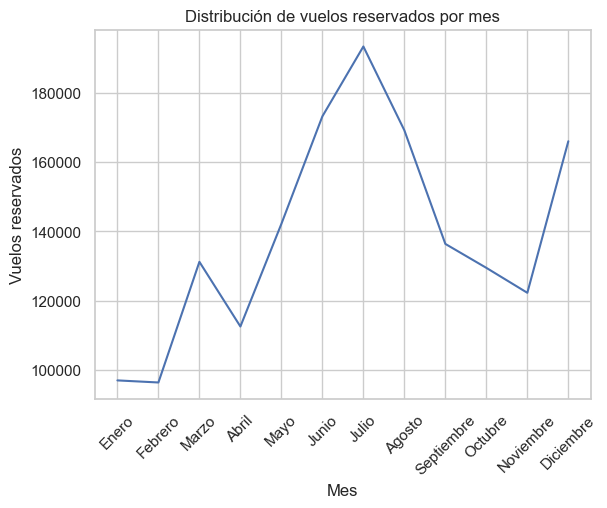

In [77]:
# ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
# Se utiliza un GRÁFICO DE LINEAS: hay una dimensión temporal (meses) y queremos ver tendencia y estacionalidad (evolución)
# Aquí agregamos por mes, no por cliente.

flights_by_month = (
    df_merged
    .groupby("Month")["Flights Booked"]
    .sum()
    .reset_index()
)

# Los nombres de los meses se gestionan mediante una lista únicamente para mejorar la legibilidad del gráfico,
# sin modificar los datos originales
meses = [
    "Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
    "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"
]            

plt.figure()
plt.plot(flights_by_month["Month"], flights_by_month["Flights Booked"])
plt.xticks(ticks=range(1, 13), labels=meses, rotation=45)  # asignación del de los meses
plt.xlabel("Mes")
plt.ylabel("Vuelos reservados")
plt.title("Distribución de vuelos reservados por mes")

plt.savefig("../outputs/vuelos_por_mes.png", bbox_inches="tight")   # para que no se corten las etiquetas, títulos, nombres largos
plt.show()

In [ ]:
# Máximo
flights_by_month.loc[
    flights_by_month["Flights Booked"].idxmax()
]

Month                  7
Flights Booked    193431
Name: 6, dtype: int64

In [ ]:
# Mínimo
flights_by_month.loc[
    flights_by_month["Flights Booked"].idxmin()
]

Month                 2
Flights Booked    96334
Name: 1, dtype: int64

In [71]:
# Total anual de vuelos
total_vuelos_anuales = flights_by_month["Flights Booked"].sum()
total_vuelos_anuales

np.int64(1669164)

In [ ]:
# Valor Absoluto / Porcentaje de julio
vuelos_julio = flights_by_month.loc[                # .loc[] para recuperar la fila completa
    flights_by_month["Month"] == 7, "Flights Booked"
].iloc[0]

porcentaje_julio = (vuelos_julio / total_vuelos_anuales) * 100
round(porcentaje_julio, 2)

np.float64(11.59)

In [74]:
# Valor Absoluto / Porcentaje de febrero
vuelos_febrero = flights_by_month.loc[
    flights_by_month["Month"] == 2, "Flights Booked"
].iloc[0]

porcentaje_febrero = (vuelos_febrero / total_vuelos_anuales) * 100
round(porcentaje_febrero, 2)

np.float64(5.77)

LECTURA ANALÍTICA:

1.- Casi 1 de cada 9 vuelos del año se reserva en julio.

2.- Febrero concentra poco más de 1 de cada 20 vuelos.

3.- La diferencia entre el mes con mayor y menor actividad es muy significativa, confirmando una estacionalidad marcada.

INTERPRETACIÓN:

Se observa una clara estacionalidad en el volumen de vuelos reservados a lo largo del año. Tras un inicio con menor actividad, febrero se sitúa como el mes con menor número de reservas, con un total de 96.334 vuelos, lo que representa aproximadamente el 5,77 % del total anual. A partir de la primavera, el volumen de vuelos aumenta de forma progresiva, alcanzando su máximo en julio, con 193.431 vuelos, que suponen alrededor del 11,59 % del total anual.

Posteriormente, se aprecia un descenso durante los meses de otoño, seguido de un repunte en diciembre, que podría estar relacionado con periodos vacacionales.

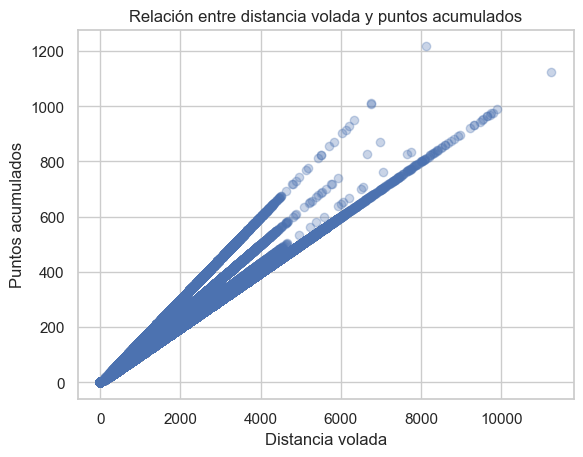

In [78]:
# ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?
# Se utiliza un DIAGRAMA DE DISPERSIÓN (SCATTER PLOT): tenemos 2 variables numérias continuas de las que se quiere ver la relación/ patrón.
plt.figure()
plt.scatter(
    df_merged["Distance"],
    df_merged["Points Accumulated"],
    alpha=0.3          # se usa transparencia porque hay muchos puntos.
)
plt.xlabel("Distancia volada")
plt.ylabel("Puntos acumulados")
plt.title("Relación entre distancia volada y puntos acumulados")

plt.savefig("../outputs/distancia_volada_y_puntos_acumulados.png", bbox_inches="tight")   
plt.show()

LECTURA ANALÍTICA:

1.- La relación entre ambas variables es fuerte y consistente, en línea con el alto coeficiente de correlación observado previamente (aprox. 0,99).

2.- A mayor distancia recorrida, mayor número de puntos acumulados: relación positiva fuerte entre ambas variables.

3.- El patrón observado confirma que los puntos dependen directamente de la distancia volada.

4.- No se observan patrones contradictorios en el comportamiento general.

INTERPRETACIÓN:

Se observa una relación positiva clara entre la distancia volada y los puntos acumulados por los clientes. A medida que aumenta la distancia de los vuelos, también aumenta el número de puntos obtenidos. Este patrón sugiere que el sistema de fidelización está fuertemente vinculado a la distancia recorrida.

Aunque se observan valores extremos (outliers) correspondientes a clientes muy activos, estos no distorsionan la relación general y representan comportamientos reales.